In [1]:
import xarray as xr 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import rioxarray as rio
import seaborn as sns
from scipy.stats import ks_2samp


In [2]:
daymet_precip = xr.open_dataset('daymet_v4_prcp_annttl_na_2022.nc')
nasadem = xr.open_dataset('/home/jbk/projects/climate/interface/src/hydrology_codes/ARW_watershed_20230416_nasadem/NASADEM_NC.001_30m_aid0001.nc')

In [13]:
arw_watershed=gpd.read_file('/home/jbk/projects/climate/interface/watershed_intercomparison/ARW_for_nate/shape_files/ARW_watershed.geojson')
ub_watershed=gpd.read_file('/home/jbk/projects/climate/interface/src/hydrology_codes/basin_12488500.json')

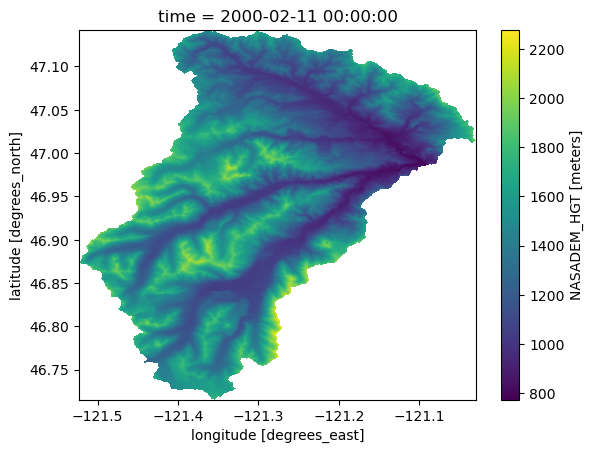

In [4]:
nasadem.NASADEM_HGT.plot()

In [5]:
#nasadem.crs
nasadem.rio.write_crs("epsg:4326", inplace=True)
testdem = nasadem.NASADEM_HGT.rio.clip(ub_watershed.geometry)

<AxesSubplot:ylabel='Density'>

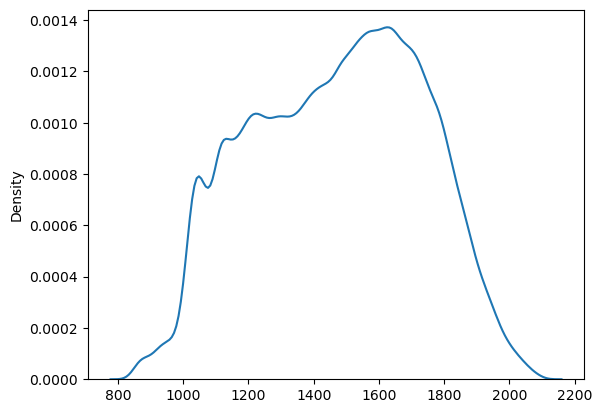

In [6]:
sns.kdeplot(testdem[0,:,:].stack(z=('lat','lon')))

KstestResult(statistic=0.14647345947624496, pvalue=0.0)


/tmp/ipykernel_114877/154021206.py:16: UserWarning: p-value floored: true value smaller than 0.001
  ad_res = stats.anderson_ksamp([testdem[0,:,:].stack(z=('lat','lon')), nasadem.NASADEM_HGT[0,:,:].stack(z=('lat','lon'))])


Anderson_ksampResult(statistic=59114.76112488364, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


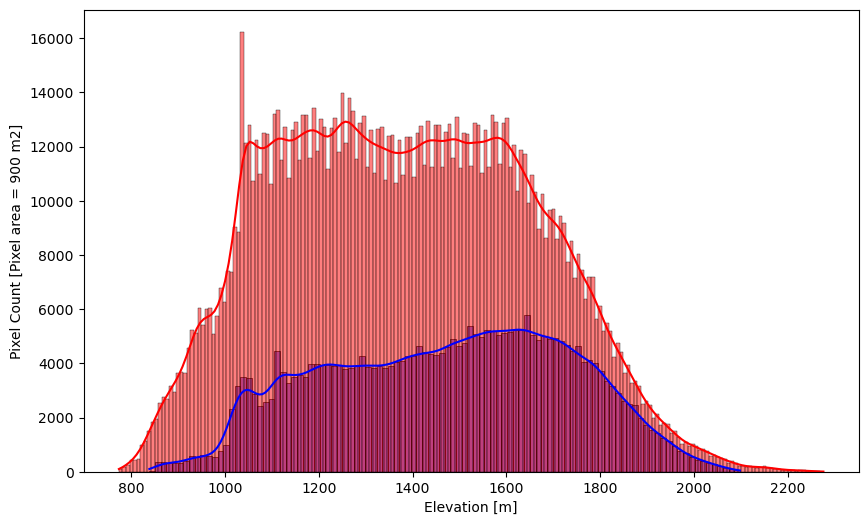

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(testdem[0,:,:].stack(z=('lat','lon')), color='blue', kde=True)
sns.histplot(nasadem.NASADEM_HGT[0,:,:].stack(z=('lat','lon')), color='red', kde=True)
plt.xlabel("Elevation [m]")
plt.ylabel("Pixel Count [Pixel area = 900 m2]")
plt.savefig("ARW_ub_elevation_hist.png", dpi=300)
#sns.kdeplot(testdem[0,:,:].stack(z=('lat','lon')), color='blue')
#sns.kdeplot(nasadem.NASADEM_HGT[0,:,:].stack(z=('lat','lon')), color='red')

#perform Kolmogorov-Smirnov test
ks_res = ks_2samp(testdem[0,:,:].stack(z=('lat','lon')), nasadem.NASADEM_HGT[0,:,:].stack(z=('lat','lon')))
print(ks_res)

from scipy import stats
# perform Anderson Darling test
ad_res = stats.anderson_ksamp([testdem[0,:,:].stack(z=('lat','lon')), nasadem.NASADEM_HGT[0,:,:].stack(z=('lat','lon'))])
print(ad_res)

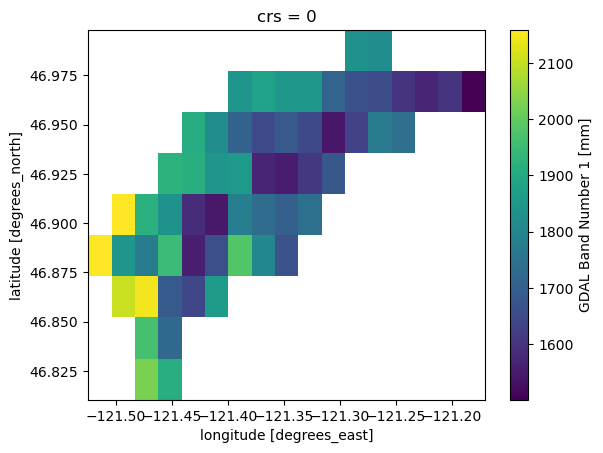

In [37]:
daymet_precip = xr.open_dataset('daymet_v4_prcp_annttl_na_2022_epsg4326.nc')

daymet_precip.rio.write_crs("epsg:4326", inplace=True)
daymet_precip.Band1.rio.clip(ub_watershed.geometry).plot()
#daymet_precip

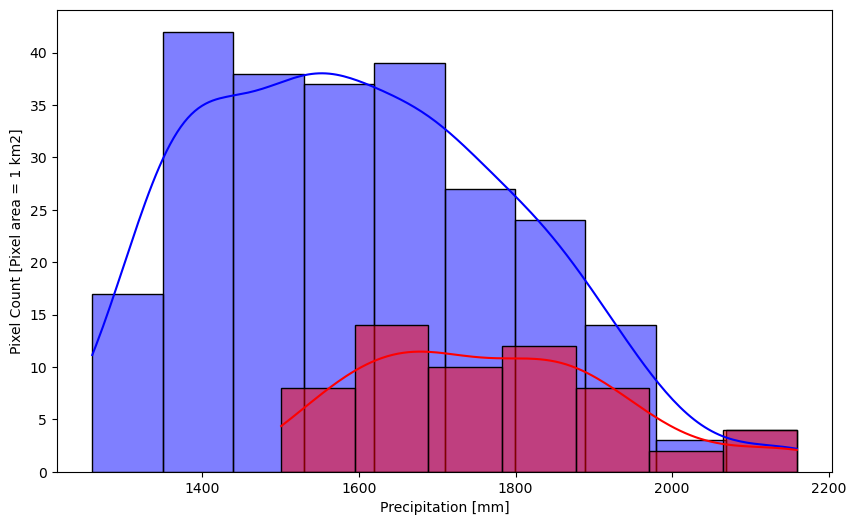

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(daymet_precip.Band1.rio.clip(arw_watershed.geometry).stack(z=('lat','lon')), color='blue', kde=True)
sns.histplot(daymet_precip.Band1.rio.clip(ub_watershed.geometry).stack(z=('lat','lon')), color='red', kde=True)
plt.xlabel("Precipitation [mm]")
plt.ylabel("Pixel Count [Pixel area = 1 km2]")
plt.savefig("ARW_ub_elevation_prcp.png", dpi=300)

In [51]:
from scipy.stats import ks_2samp
#perform Kolmogorov-Smirnov test
ks_2samp(daymet_precip.Band1.rio.clip(arw_watershed.geometry).stack(z=('lat','lon')), daymet_precip.Band1.rio.clip(ub_watershed.geometry).stack(z=('lat','lon')))

from scipy import stats
# perform Anderson Darling test
stats.anderson_ksamp([daymet_precip.Band1.rio.clip(arw_watershed.geometry).stack(z=('lat','lon')), daymet_precip.Band1.rio.clip(ub_watershed.geometry).stack(z=('lat','lon'))])

/tmp/ipykernel_114877/793981785.py:6: UserWarning: p-value floored: true value smaller than 0.001
  stats.anderson_ksamp([daymet_precip.Band1.rio.clip(arw_watershed.geometry).stack(z=('lat','lon')), daymet_precip.Band1.rio.clip(ub_watershed.geometry).stack(z=('lat','lon'))])


Anderson_ksampResult(statistic=17.11808259969084, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)